# <center> <strong>Variables de estado</strong> </center>

---


## <center> <strong>Librerías necesarias</strong> </center>


<p style='text-align: justify'>
    El módulo de <a href="https://python-control.readthedocs.io/en/">control</a> es un conjunto de liberías y funciones enfocadas a las operaciones comúnes para el análisis y diseño de los sistemas de control de realimentación. Para más detalles consultar: <a href="https://python-control.readthedocs.io/en/">https://python-control.readthedocs.io/en/</a>
<p>


In [32]:
from control.matlab import tf, tf2ss, step, ss, ss2tf
from util import *

## <center> <strong>Ejemplos</strong> </center>


#### ¿Cómo convertir una función de transferencia a un espacio de estados?


<StateSpace>: sys[92]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[-2. -1.]
     [ 1.  0.]]

B = [[-1.]
     [ 0.]]

C = [[ 0. -2.]]

D = [[0.]]



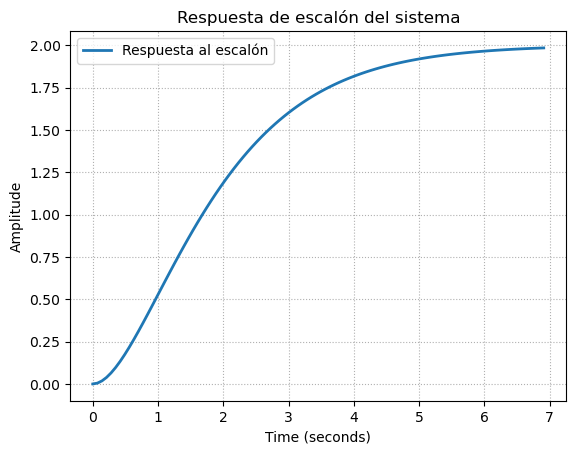

In [33]:
# Definir la función de transferencia
tf_sys = tf(2, [1, 2, 1])

# Convertir la función de transferencia en un espacio de estados
ss_sys = tf2ss(tf_sys)

# Mostrar las matrixes A, B, C y D
print(ss_sys)

# Simular la respuesta de escalón de una función de transferencia
y, t = step(ss_sys)

# Graficar la respuesta de escalón
step_plot(t, y)

#### ¿Cómo convertir un espacio de estados en una función de transferencia (SISO)?

##### _Ejemplo Motivador 1_


<TransferFunction>: sys[96]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      6
-------------
s^2 + 3 s + 2



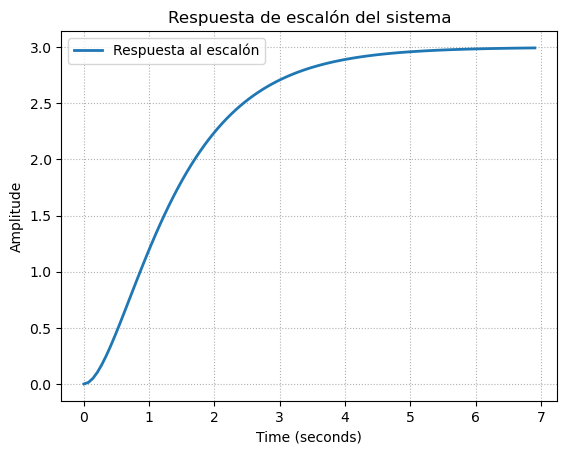

In [34]:
# Datos del ejemplo
R = 3
L = 1
C = 1/2

# Matrices del espacio de estado
A = [[0, -1/C], [1/L, -R/L]]
B = [[1/C], [0]]
C = [[0, R]]
D = [[0]]

# Crear un sistema de espacio de estados usando las matrices A, B, C y D
ss_sys = ss(A, B, C, D)

# Convertir el sistema de espacio de estados a una función de transferencia
tf_sys = ss2tf(ss_sys)

# Mostrar
print(tf_sys)

# Simular la respuesta de escalón de una función de transferencia
y, t = step(tf_sys)

# Graficar la respuesta de escalón
step_plot(t, y)

#### ¿Cómo convertir un espacio de estados en distintas funciones de transferencia (MIMO)?


In [36]:
from scipy.signal import ss2tf

# Constantes
c = 1e-06
l = 1.5e-03
R = 100
U1_op = 9
U2_op = 0.3

# Definimos las matrices del sistema MIMO
A = [[0, -1/l], [1/c, -1/(R * c)]]
B = [[U2_op/l, U1_op/l], [0, 0]]
C = [[1, 0], [0, 1]]
D = [[0, 0], [0, 0]]

# Obtener funciones de transferencia para cada salida
num1, den1 = ss2tf(A, B, C, D, input=0)
tf_sys1 = (num1, den1)

num2, den2 = ss2tf(A, B, C, D, input=1)
tf_sys2 = (num2, den2)

# Obtener funciones de transferencia desde cada entrada a cada salida
X1_U1 = tf(tf_sys1[0][0], tf_sys1[1])  # Función de transferencia de la entrada 1 a la salida 1
X2_U1 = tf(tf_sys1[0][1], tf_sys1[1])  # Función de transferencia de la entrada 1 a la salida 2
X1_U2 = tf(tf_sys2[0][0], tf_sys2[1])  # Función de transferencia de la entrada 2 a la salida 1
X2_U2 = tf(tf_sys2[0][1], tf_sys2[1])  # Función de transferencia de la entrada 2 a la salida 2

# Mostrar las funciones de transferencia
print(f'''
Entrada 1 Salida 1 (X1_U1): {X1_U1}
Entrada 1 Salida 2 (X2_U1): {X2_U1}
Entrada 2 Salida 1 (X1_U2): {X1_U2}
Entrada 2 Salida 2 (X2_U2): {X2_U2}
''')


Entrada 1 Salida 1 (X1_U1): <TransferFunction>: sys[105]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      200 s + 2e+06
-------------------------
s^2 + 1e+04 s + 6.667e+08

Entrada 1 Salida 2 (X2_U1): <TransferFunction>: sys[106]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1.819e-12 s + 2e+08
-------------------------
s^2 + 1e+04 s + 6.667e+08

Entrada 2 Salida 1 (X1_U2): <TransferFunction>: sys[107]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     6000 s + 6e+07
-------------------------
s^2 + 1e+04 s + 6.667e+08

Entrada 2 Salida 2 (X2_U2): <TransferFunction>: sys[108]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1.819e-12 s + 6e+09
-------------------------
s^2 + 1e+04 s + 6.667e+08


